In [1]:
# stochastic model for option pricing

import numpy as np
import matplotlib.pyplot as plt
import QuantLib as ql


In [2]:

# Define the valuation date
valuation_date = ql.Date(12, 3, 2024)
ql.Settings.instance().evaluationDate = valuation_date


In [3]:

# Define the interest rate term structure
risk_free_rate = 0.035
day_count = ql.Actual360()
compounding = ql.Continuous
interest_rate_curve = ql.YieldTermStructureHandle(
    ql.FlatForward(valuation_date, risk_free_rate, day_count, compounding)
)


In [4]:
# Define the stock volatility
sigma = 0.20
asset_price = 100
dividend_yield = 0.0
volatility = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(valuation_date, ql.NullCalendar(), sigma, day_count)
)

In [5]:

# Define the underlying asset
process = ql.BlackScholesMertonProcess(
    ql.QuoteHandle(ql.SimpleQuote(asset_price)),
    ql.YieldTermStructureHandle(ql.FlatForward(valuation_date, dividend_yield, day_count)),
    interest_rate_curve,
    volatility
)

In [6]:
# Define the Asian option
settlement_date = ql.Date(12, 3, 2014)
maturity_date = ql.Date(12, 3, 2015)
strike_price = 90
option_type = ql.Option.Call
average_type = ql.Average.Arithmetic


In [7]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
average_dates = ql.DateVector([valuation_date, maturity_date])
asian_option = ql.DiscreteAveragingAsianOption(
    average_type, average_dates, payoff, exercise
)

In [8]:
# Define the stochastic volatility model (e.g., Heston model)
v0 = sigma**2
kappa = 2.0
theta = sigma**2
rho = -0.5
xi = 0.1


In [9]:
heston_process = ql.HestonProcess(
    interest_rate_curve,
    ql.YieldTermStructureHandle(ql.FlatForward(valuation_date, dividend_yield, day_count)),
    ql.QuoteHandle(ql.SimpleQuote(asset_price)),
    v0, kappa, theta, xi, rho
)

engine = ql.MCDiscreteArithmeticAPHestonEngine(
    heston_process, "pseudorandom", timeStepsPerYear=1, requiredSamples=10000
)

asian_option.setPricingEngine(engine)


In [10]:
# Calculate the price
price = asian_option.NPV()
print(f"The price of the Asian option using the Heston stochastic volatility model is: {price:.2f}")

The price of the Asian option using the Heston stochastic volatility model is: 0.00


In [11]:
def generate_paths(S0, r, sigma, T, M, I):
    dt = T / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

In [12]:
import QuantLib as ql

# Define the valuation date
valuation_date = ql.Date(12, 3, 2014)
ql.Settings.instance().evaluationDate = valuation_date

# Define the interest rate term structure
risk_free_rate = 0.035
day_count = ql.Actual360()
compounding = ql.Continuous
interest_rate_curve = ql.YieldTermStructureHandle(
    ql.FlatForward(valuation_date, risk_free_rate, day_count, compounding)
)

# Define the stock volatility
sigma = 0.02857
asset_price = 83.57
dividend_yield = 0.05136
volatility = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(valuation_date, ql.NullCalendar(), sigma, day_count)
)

# Define the underlying asset
process = ql.BlackScholesMertonProcess(
    ql.QuoteHandle(ql.SimpleQuote(asset_price)),
    ql.YieldTermStructureHandle(ql.FlatForward(valuation_date, dividend_yield, day_count)),
    interest_rate_curve,
    volatility
)

# Define the Asian option
settlement_date = ql.Date(12, 3, 2014)
maturity_date = ql.Date(12, 3, 2015)
strike_price = 90
option_type = ql.Option.Call
average_type = ql.Average.Arithmetic

payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
average_dates = ql.DateVector([valuation_date + i for i in range(1, 366)])
asian_option = ql.DiscreteAveragingAsianOption(
    average_type, average_dates, payoff, exercise
)

# Define the stochastic volatility model (Heston model)
v0 = sigma**2
kappa = 2.0
theta = sigma**2
rho = -0.5
xi = 0.1

heston_process = ql.HestonProcess(
    interest_rate_curve,
    ql.YieldTermStructureHandle(ql.FlatForward(valuation_date, dividend_yield, day_count)),
    ql.QuoteHandle(ql.SimpleQuote(asset_price)),
    v0, kappa, theta, xi, rho
)

# Use a Monte Carlo engine with increased samples
engine = ql.MCDiscreteArithmeticAPHestonEngine(
    heston_process, "pseudorandom", timeStepsPerYear=252, requiredSamples=50000
)

asian_option.setPricingEngine(engine)

# Calculate the price
price = asian_option.NPV()
print(f"The price of the Asian option using the Heston stochastic volatility model is: {price:.2f}")


The price of the Asian option using the Heston stochastic volatility model is: 0.00


In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

In [14]:
# Fetch historical data for USD/INR
ticker = 'USDINR=X'
data = yf.download(ticker, start='2020-01-01', end='2024-07-01', interval='1d')

# Display the first few rows of the data
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,71.275803,71.430000,71.029999,71.275803,71.275803,0
2020-01-02,71.025002,71.405502,71.025002,71.025002,71.025002,0
2020-01-03,71.415001,71.995003,71.229797,71.415001,71.415001,0
2020-01-06,71.720001,72.190002,71.703003,71.731003,71.731003,0
2020-01-07,72.019997,72.032600,71.668999,71.787003,71.787003,0


In [15]:
# Calculate log returns
data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))

# Drop NaN values
log_returns = data['Log Returns'].dropna()

# Display the first few log returns
log_returns.head()

Date
2020-01-02   -0.003525
2020-01-03    0.005476
2020-01-06    0.004415
2020-01-07    0.000780
2020-01-08    0.005182
Name: Log Returns, dtype: float64

In [16]:

# Function to estimate the kappa and sigma of the Ornstein-Uhlenbeck process
def ornstein_uhlenbeck_params(log_returns):
    dt = 1  # Assuming daily returns, dt = 1 day
    
    # Define the negative log-likelihood function
    def neg_log_likelihood(params):
        kappa, sigma = params
        theta = np.mean(log_returns)
        diff = log_returns - theta
        n = len(log_returns)
        
        likelihood = (
            - n * np.log(sigma * np.sqrt(2 * np.pi))
            - (1 - np.exp(-2 * kappa * dt)) / (2 * sigma**2) * np.sum(diff[:-1] * diff[1:])
            + kappa / sigma**2 * np.sum(diff**2)
        )
        return -likelihood
    
    # Initial guesses for kappa and sigma
    initial_guess = [0.1, 0.1]
    
    # Minimize the negative log-likelihood
    result = minimize(neg_log_likelihood, initial_guess, method='L-BFGS-B', bounds=[(1e-5, None), (1e-5, None)])
    kappa, sigma = result.x
    
    return kappa, sigma

# Estimate kappa and sigma
kappa, sigma = ornstein_uhlenbeck_params(log_returns)

# Calculate variance
variance = sigma**2 

In [17]:
#  Display the results
print(f"Kappa (rate of mean reversion): {kappa}")
print(f"Variance: {variance}")

Kappa (rate of mean reversion): 2.2703538160672738e+52
Variance: 1.0000000000000002e-10


In [18]:
def generate_heston_paths(S0, v0, r, kappa, theta, xi, rho, T, N, M):
    dt = T / N
    S = np.zeros((M, N + 1))
    v = np.zeros((M, N + 1))
    S[:, 0] = S0
    v[:, 0] = v0

    for t in range(1, N + 1):
        Z1 = np.random.normal(size=M)
        Z2 = np.random.normal(size=M)
        W1 = np.sqrt(dt) * Z1
        W2 = rho * W1 + np.sqrt(1 - rho**2) * np.sqrt(dt) * Z2

        v[:, t] = np.maximum(v[:, t - 1] + kappa * (theta - v[:, t - 1]) * dt + xi * np.sqrt(v[:, t - 1]) * W2, 0)
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * v[:, t - 1]) * dt + np.sqrt(v[:, t - 1]) * W1)

    return S

# Parameters
S0 = 100       # Initial stock price
v0 = 0.04      # Initial variance
r = 0.035      # Risk-free rate
kappa = 2.0    # Speed of mean reversion
theta = 0.04   # Long-run variance
xi = 0.1       # Volatility of volatility
rho = -0.8     # Correlation between the two Brownian motions
T = 1          # Time to maturity (1 year)
N = 252        # Number of time steps (daily steps)
M = 10000      # Number of paths

# Generate paths
S_paths = generate_heston_paths(S0, v0, r, kappa, theta, xi, rho, T, N, M)


In [19]:
def asian_option_price(S_paths, K, r, T, option_type='call'):
    M, N = S_paths.shape
    average_S = np.mean(S_paths, axis=1)
    
    if option_type == 'call':
        payoffs = np.maximum(average_S - K, 0)
    elif option_type == 'put':
        payoffs = np.maximum(K - average_S, 0)
    
    discounted_payoff = np.exp(-r * T) * np.mean(payoffs)
    return discounted_payoff

# Option parameters
K = 90         # Strike price
option_type = 'call'  # Option type: 'call' or 'put'

# Calculate the Asian option price
asian_option_price_value = asian_option_price(S_paths, K, r, T, option_type)
print(f"The price of the Asian option using the Heston model is: {asian_option_price_value:.2f}")


The price of the Asian option using the Heston model is: 12.27


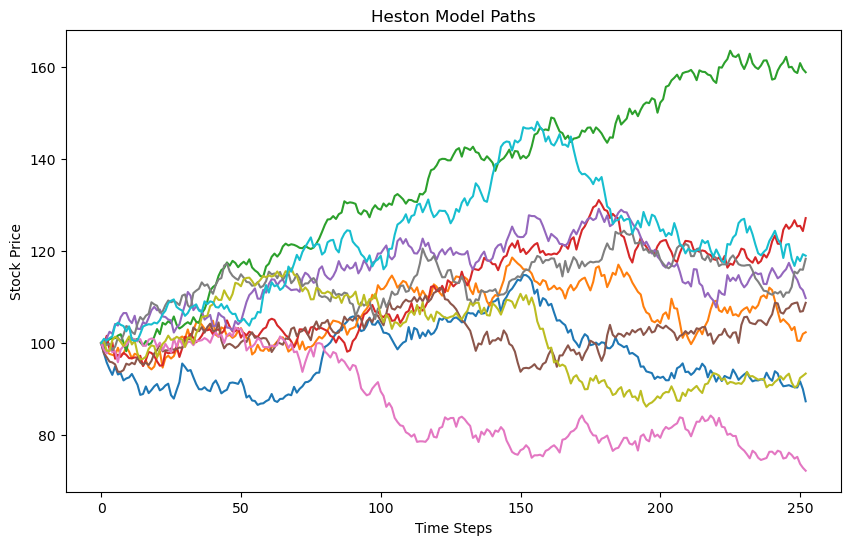

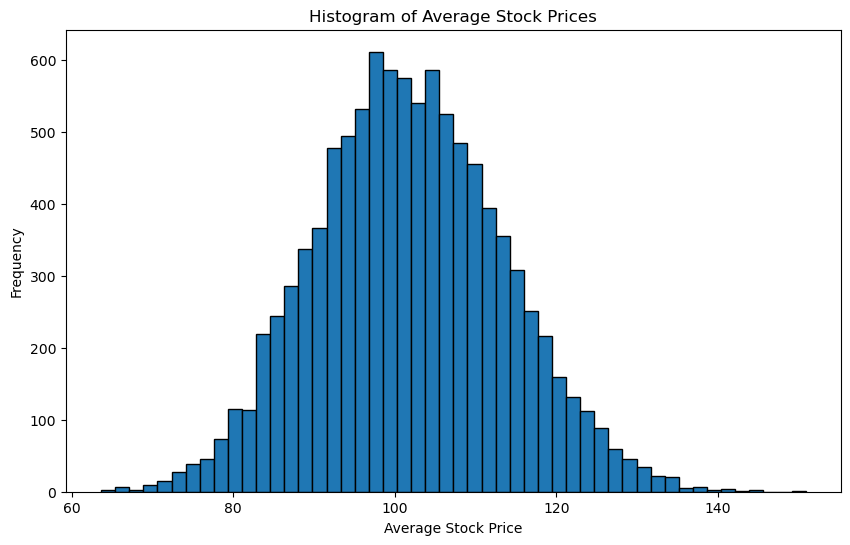

In [20]:
# plot the paths
plt.figure(figsize=(10, 6))
plt.plot(S_paths[:10].T)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Heston Model Paths')
plt.show()

# plot the histogram of the average stock prices
plt.figure(figsize=(10, 6))
plt.hist(np.mean(S_paths, axis=1), bins=50, edgecolor='k')
plt.xlabel('Average Stock Price')
plt.ylabel('Frequency')
plt.title('Histogram of Average Stock Prices')
plt.show()


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes price function
def black_scholes_price(spot, strike, time_to_expiry, rd, rf, vol, option_type='call'):
    if time_to_expiry <= 0 or vol <= 0 or spot <= 0 or strike <= 0:
        return 0 if option_type == 'call' else max(strike - spot, 0)
    
    d1 = (np.log(spot / strike) + (rd - rf + 0.5 * vol ** 2) * time_to_expiry) / (vol * np.sqrt(time_to_expiry))
    d2 = d1 - vol * np.sqrt(time_to_expiry)
    if option_type == 'call':
        return spot * np.exp(-rf * time_to_expiry) * norm.cdf(d1) - strike * np.exp(-rd * time_to_expiry) * norm.cdf(d2)
    else:
        return strike * np.exp(-rd * time_to_expiry) * norm.cdf(-d2) - spot * np.exp(-rf * time_to_expiry) * norm.cdf(-d1)

# Define a mock implied volatility surface
def iv_surface(spot, time_to_expiry):
    return 0.028145  # Using the average ATM volatility

# Leverage Surface Calibration
def leverage_surface_calibration(S, t, iv_surface, rd, rf, kappa, xi, rho):
    # Placeholder for leverage surface calibration
    # This involves solving the forward Kolmogorov PDE
    # Here we use a mock leverage surface function for simplicity
    return lambda S, t: iv_surface(S, t) / np.sqrt(1 + xi ** 2)

# Example parameters for the SLV model
kappa = 0.5
xi = 0.1
rho = 0.5

# Define parameters from the screenshot
spot = 83.5900
strike = 84.1320
rf = 0.05136
rd = 0.06514
expiry = 0.5


leverage_surface = leverage_surface_calibration(spot, expiry, iv_surface, rd, rf, kappa, xi, rho)

# Simulation of the dynamics
def simulate_dynamics(spot, rd, rf, leverage_surface, kappa, xi, rho, expiry, num_paths, dt):
    num_steps = int(expiry / dt) + 1
    S_paths = np.zeros((num_paths, num_steps))
    V_paths = np.zeros((num_paths, num_steps))
    S_paths[:, 0] = spot
    V_paths[:, 0] = 1.0  # Initial volatility

    for t in range(1, num_steps):
        dW1 = np.random.normal(0, np.sqrt(dt), num_paths)
        dW2 = np.random.normal(0, np.sqrt(dt), num_paths)
        dW2 = rho * dW1 + np.sqrt(1 - rho ** 2) * dW2

        S_paths[:, t] = S_paths[:, t - 1] * np.exp((rd - rf - 0.5 * leverage_surface(S_paths[:, t - 1], t * dt) ** 2 * V_paths[:, t - 1] ** 2) * dt + leverage_surface(S_paths[:, t - 1], t * dt) * V_paths[:, t - 1] * dW1)
        V_paths[:, t] = V_paths[:, t - 1] + kappa * (1 - V_paths[:, t - 1]) * dt + xi * V_paths[:, t - 1] * dW2

    return S_paths, V_paths

# Parameters for simulation
num_paths = 10000
dt = 1/252  # daily steps

S_paths, V_paths = simulate_dynamics(spot, rd, rf, leverage_surface, kappa, xi, rho, expiry, num_paths, dt)

# Option Pricing
def price_option(S_paths, strike, rd, expiry):
    payoffs = np.maximum(S_paths[:, -1] - strike, 0)
    price = np.exp(-rd * expiry) * np.mean(payoffs)
    return price

option_price = price_option(S_paths, strike, rd, expiry)
print("Option Price: ", option_price*100/spot)



Option Price:  0.8149554717568892


Option Price:  4.599459568226868


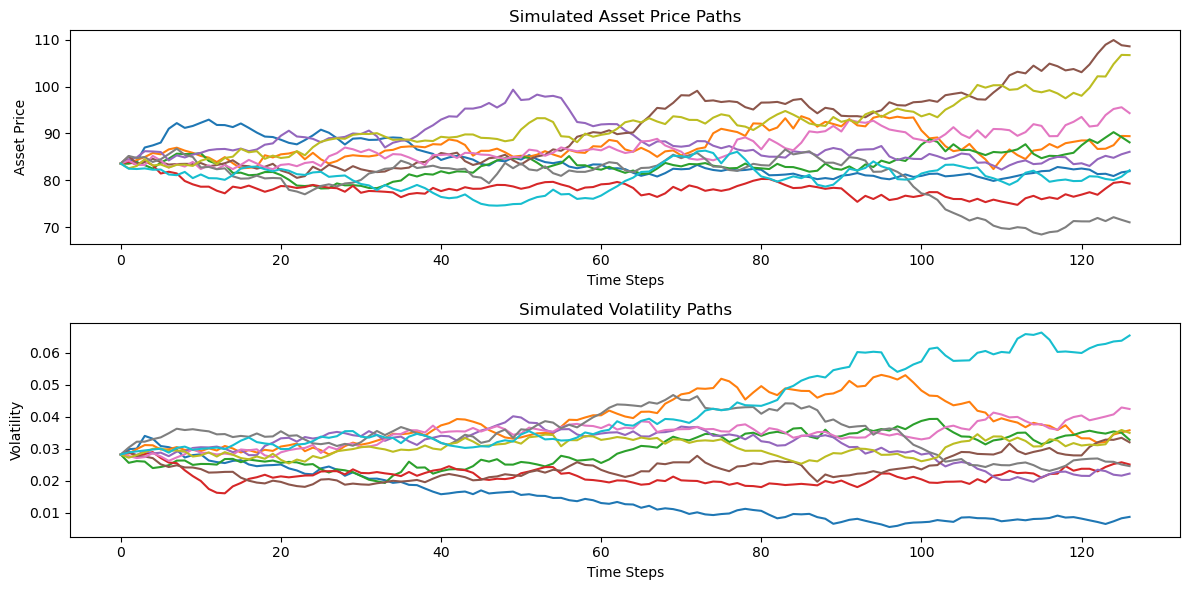

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
spot = 83.5900  # Spot price
strike = 84.1080  # Strike price
expiry = 0.5  # Time to expiry in years
rf = 0.0513  # Domestic risk-free rate
rd = 0.0645  # Foreign risk-free rate
mu = rd - rf  # Drift rate
rho = 0.5  # Correlation between asset price and volatility
xi = 0.1  # Volatility of volatility
alpha = lambda S, v, t: 0.2 * (0.04 - v)  # Mean-reverting term
beta = lambda S, v, t: np.sqrt(v)  # Scaling function for volatility
num_paths = 10000  # Number of simulation paths
dt = 1/252  # Time step (daily)
num_steps = int(expiry / dt)  # Number of time steps
initial_volatility = 0.028145  # Initial volatility

# Simulation function
def simulate_dynamics(spot, mu, alpha, xi, beta, rho, expiry, num_paths, dt, initial_volatility):
    num_steps = int(expiry / dt) + 1
    S_paths = np.zeros((num_paths, num_steps))
    v_paths = np.zeros((num_paths, num_steps))
    S_paths[:, 0] = spot
    v_paths[:, 0] = initial_volatility

    for t in range(1, num_steps):
        dW1 = np.random.normal(0, np.sqrt(dt), num_paths)
        dW2 = np.random.normal(0, np.sqrt(dt), num_paths)
        dW2 = rho * dW1 + np.sqrt(1 - rho ** 2) * dW2

        S_paths[:, t] = S_paths[:, t - 1] * np.exp((mu - 0.5 * v_paths[:, t - 1]) * dt + np.sqrt(v_paths[:, t - 1]) * dW1)
        v_paths[:, t] = v_paths[:, t - 1] + alpha(S_paths[:, t - 1], v_paths[:, t - 1], t * dt) * dt + xi * beta(S_paths[:, t - 1], v_paths[:, t - 1], t * dt) * dW2

        # Ensure volatility is non-negative
        v_paths[:, t] = np.maximum(v_paths[:, t], 0)

    return S_paths, v_paths

# Price the option
def price_option(S_paths, strike, rd, expiry):
    payoffs = np.maximum(S_paths[:, -1] - strike, 0)
    price = np.exp(-rd * expiry) * np.mean(payoffs)
    return price

# Run the simulation
S_paths, v_paths = simulate_dynamics(spot, mu, alpha, xi, beta, rho, expiry, num_paths, dt, initial_volatility)

# Calculate the option price
option_price = price_option(S_paths, strike, rd, expiry)
print("Option Price: ", option_price * 100 / spot)

# Plot the first few simulated paths for the asset price and volatility
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(S_paths[:10].T)
plt.title('Simulated Asset Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Asset Price')

plt.subplot(2, 1, 2)
plt.plot(v_paths[:10].T)
plt.title('Simulated Volatility Paths')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')

plt.tight_layout()
plt.show()
